## Team Youza: Motivate bike data analysis

### import dependencies

In [1]:
from reader import load_dataframe
import pandas as pd
import numpy as np
import os
import glob
from datetime import date, datetime
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
import matplotlib.ticker as mtick
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.patches as mpatches
import folium
from folium.plugins import HeatMap

plot_colors=["#3498db","#9b59b6", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", '#ffce44']

### import data

In [2]:
df = pd.read_csv('ny_sf_all_data_0703.csv', parse_dates=[1,2])
df.sample(15)

city bikeid               starttime  \
10511        New York  29586 2018-01-27 16:31:54.000   
212933  San Francisco   3499 2018-03-30 19:27:56.546   
457751  San Francisco    792 2018-05-31 08:49:27.033   
457642  San Francisco   2472 2018-05-31 09:05:17.288   
478000  San Francisco   1564 2018-05-27 16:59:04.907   
235608  San Francisco    281 2018-03-26 14:20:02.253   
416047  San Francisco   3300 2018-04-10 09:35:00.778   
338876  San Francisco   3893 2018-04-27 09:01:43.926   
621325  San Francisco     11 2018-05-02 14:32:41.549   
24328        New York  29611 2018-02-23 17:15:33.000   
178704  San Francisco   2054 2018-02-08 10:10:14.385   
359870  San Francisco   3127 2018-04-23 17:45:18.582   
523312  San Francisco   2876 2018-05-19 09:17:40.846   
286851  San Francisco   3345 2018-03-10 19:08:44.003   
488956  San Francisco   2050 2018-05-25 09:01:47.463   

                        stoptime  tripduration  \
10511        2018-01-27 16:34:27           152   
212933  2018-03-30 19:38:01.8940           605   
457751  2018-05-31 09:04:40.8180           913   
457642  2018-05-31 09:10:49.1320           331   
478000  2018-05-27 17:06:32.5690           447   
235608  2018-03-26 14:24:26.4790           264   
416047  2018-04-10 09:47:49.0700           768   
338876  2018-04-27 09:10:09.4580           505   
621325  2018-05-02 15:03:50.8360          1869   
24328        2018-02-23 17:18:37           184   
178704  2018-02-08 10:14:54.2220           279   
359870  2018-04-23 17:54:09.8710           531   
523312  2018-05-19 09:35:45.1590          1084   
286851  2018-03-10 19:31:01.2530          1337   
488956  2018-05-25 09:08:09.8340           382   

                                       start station name  \
10511                                    Essex Light Rail   
212933                              Spear St at Folsom St   
457751                              Laguna St at Hayes St   
457642                           Shattuck Ave at 55th Ave   
478000  San Francisco Public Library (Grove St at Hyde...   
235608                           Santa Clara St at 7th St   
416047                                 Berry St at 4th St   
338876                            Beale St at Harrison St   
621325                          West Oakland BART Station   
24328                                       Grove St PATH   
178704                           Market St at Franklin St   
359870                                2nd St at Folsom St   
523312                                Broadway at 30th St   
286851                       The Embarcadero at Bryant St   
488956                     16th St Mission BART Station 2   

        start station latitude  start station longitude  \
10511                40.712774               -74.036486   
212933               37.789677              -122.390428   
457751               37.776435              -122.426244   
457642               37.840364              -122.264488   
478000               37.778768              -122.415929   
235608               37.339146              -121.884105   
416047               37.775880              -122.393170   
338876               37.788059              -122.391865   
621325               37.805318              -122.294837   
24328                40.719586               -74.043117   
178704               37.773793              -122.421239   
359870               37.785000              -122.395936   
523312               37.819381              -122.261928   
286851               37.787168              -122.388098   
488956               37.764765              -122.420091   

                                    end station name  end station latitude  \
10511                                 Exchange Place             40.716247   
212933                  4th St at Mission Bay Blvd S             37.770407   
457751                         Howard St at Beale St             37.789756   
457642                        MacArthur BART Station             37.828410   
478000 

### review data

In [3]:
print(df.shape)
print(df.dtypes)
print()
print(df.describe())

(631373, 15)
city                               object
bikeid                             object
starttime                  datetime64[ns]
stoptime                           object
tripduration                        int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station name                   object
end station latitude              float64
end station longitude             float64
usertype                           object
birth year                        float64
gender                             object
age                               float64
dtype: object

       tripduration  start station latitude  start station longitude  \
count  6.313730e+05           631373.000000            631373.000000   
mean   8.332047e+02               38.247734              -114.471648   
std    3.752489e+03                1.096867                17.846863   
min    6.100000e+01               37.312854           

### clean data

In [4]:
df.fillna('Other')
df['start hour'] = df['starttime'].apply(lambda x: x.hour + (round((x.minute/60)*4))/4) #rounds to quarter hour

#convert andsplit date/time
df['starttime'] = pd.to_datetime(df['starttime'])
df.dtypes['starttime']
#will display month
df['month'] = df['starttime'].dt.month
#will display hour
df['hour'] = df['starttime'].dt.hour
#will display name of the day
df['day_of_week'] = df['starttime'].dt.weekday_name

#age grouping
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_groups = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age groups'] = pd.cut(df['age'], age_bins, labels=age_groups)

df.head()

city bikeid           starttime             stoptime  tripduration  \
0  New York  29590 2018-01-01 00:01:46  2018-01-01 00:03:58           132   
1  New York  29613 2018-01-01 01:27:17  2018-01-01 01:36:38           560   
2  New York  31940 2018-01-01 01:29:03  2018-01-01 01:33:58           294   
3  New York  31949 2018-01-01 01:59:32  2018-01-01 02:02:49           197   
4  New York  31929 2018-01-01 02:06:18  2018-01-01 02:21:50           932   

  start station name  start station latitude  start station longitude  \
0      Grove St PATH               40.719586               -74.043117   
1   Marin Light Rail               40.714584               -74.042817   
2            Sip Ave               40.730743               -74.063784   
3         Newark Ave               40.721525               -74.046305   
4     Exchange Place               40.716247               -74.033459   

        end station name  end station latitude  end station longitude  \
0             Newark Ave             40.721525             -74.046305   
1        Brunswick & 6th             40.726012             -74.050389   
2  Baldwin at Montgomery             40.723659             -74.064194   
3       Monmouth and 6th             40.725685             -74.048790   
4           Newport Pkwy             40.728745             -74.032108   

     usertype  birth year  gender   age  start hour  month  hour day_of_week  \
0  Subscriber      1964.0    Male  54.0         0.0      1     0      Monday   
1  Subscriber      1989.0  Female  29.0         1.5      1     1      Monday   
2  Subscriber      1994.0    Male  24.0         1.5      1     1      Monday   
3  Subscriber      1964.0    Male  54.0         2.0      1     1      Monday   
4  Subscriber      1992.0    Male  26.0         2.0      1     2      Monday   

  age groups  
0      51-60  
1      21-30  
2      21-30  
3      51-60  
4      21-30

In [5]:
#group data by city
sf_df=df.loc[df['city']=='San Francisco']
ny_df=df.loc[df['city']=='New York']

### Parsing Data - Gender

In [6]:
#create df based on gender
nyfemale_df = ny_df.loc[ny_df["gender"] == "Female"]
nymale_df = ny_df.loc[ny_df["gender"] == "Male"]
sffemale_df = sf_df.loc[sf_df["gender"] == "Female"]
sfmale_df = sf_df.loc[sf_df["gender"] == "Male"]

In [7]:
#the same analysis was conducted for San Francisco and New York Males and Females
#NY female stats:
ny_female_percent = len(nyfemale_df) / (len(nyfemale_df) + len(nymale_df))
ny_female_subscriber_percent = len(nyfemale_df['usertype'] == 'Subscriber') / len(ny_df['usertype'] == 'Subscriber')
ny_female_avg_age = round(nyfemale_df.age.mean())
ny_female_avg_duration = round(nyfemale_df.tripduration.mean())
ny_female_pop_start = nyfemale_df['start station name'].value_counts().idxmax()
ny_female_pop_stop = nyfemale_df['end station name'].value_counts().idxmax()

print('Percentage of total NY riders that are female: ', ny_female_percent)
print('Percentage of total NY subscribers that are female: ', ny_female_subscriber_percent)
print('Avg. age of female riders in NY is: ', ny_female_avg_age)
print('Avg. trip duration for females in NY is: ', ny_female_avg_duration, ' minutes')
print('The most popular start station in NY for females is:', ny_female_pop_start)
print('The most popular end station in NY for females is:', ny_female_pop_stop)

Percentage of total NY riders that are female:  0.20733680251429748
Percentage of total NY subscribers that are female:  0.19538935122694917
Avg. age of female riders in NY is:  37
Avg. trip duration for females in NY is:  605  minutes
The most popular start station in NY for females is: Grove St PATH
The most popular end station in NY for females is: Grove St PATH


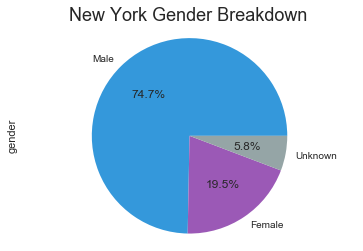

In [8]:
#NY Gender Charts - Pie charts are great
sns.set()
ny_df.gender.value_counts().plot(kind='pie', autopct="%1.1f%%", colors = plot_colors)
plt.title('New York Gender Breakdown', fontsize=18)
plt.axis("equal")
plt.show()

### Parsing Data - Age

In [9]:
avg_age = df['age'].mean()
sf_avg_age = sf_df['age'].mean()
ny_avg_age = ny_df['age'].mean()
print('the overall average age is: {}'.format(avg_age))
print('the average age in New York is: {}'.format(ny_avg_age))
print('the average age in San Francisco is: {}'.format(sf_avg_age))

the overall average age is: 36.36047789302517
the average age in New York is: 38.046535888886616
the average age in San Francisco is: 36.02414004162076


In [10]:
#Age group breakdown by Age and Gender
sf_age_gender = sf_df.groupby(['age groups', 'gender']).gender.count().unstack().fillna(0)
sf_age_gender =sf_age_gender.drop(['Other'], axis =1).reset_index()
sf_age_gender = sf_age_gender[['age groups', 'Male', 'Female']]
sf_age_gender

gender age groups    Male  Female
0            0-20    4694    1595
1           21-30  115762   48292
2           31-40  136400   45198
3           41-50   63078   16066
4           51-60   31093    8818
5             61+    9509    2079

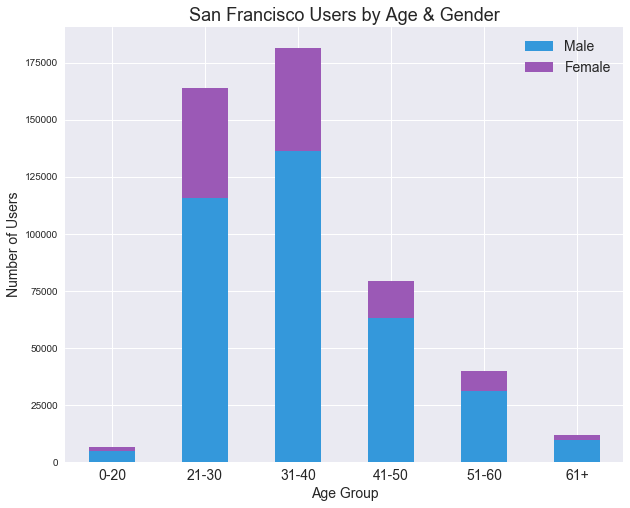

In [11]:
# age group break down by gender SF
sf_age_gender.plot(kind='bar', color =plot_colors, stacked=True, figsize=(10,8))
plt.legend(fontsize=14)
plt.title('San Francisco Users by Age & Gender', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 14, rotation =0)
plt.show()

In [12]:
zero = sf_df[sf_df['age groups'] == '0-20']
twenty1= sf_df[sf_df['age groups'] == '31-40' ]
forty1 = sf_df[sf_df['age groups'] == '41-50' ]
fifty1 = sf_df[sf_df['age groups'] == '51-60' ]
sixty1 = sf_df[sf_df['age groups'] == '61+' ] 
thirty1 = sf_df[sf_df['age groups'] == '21-30' ]

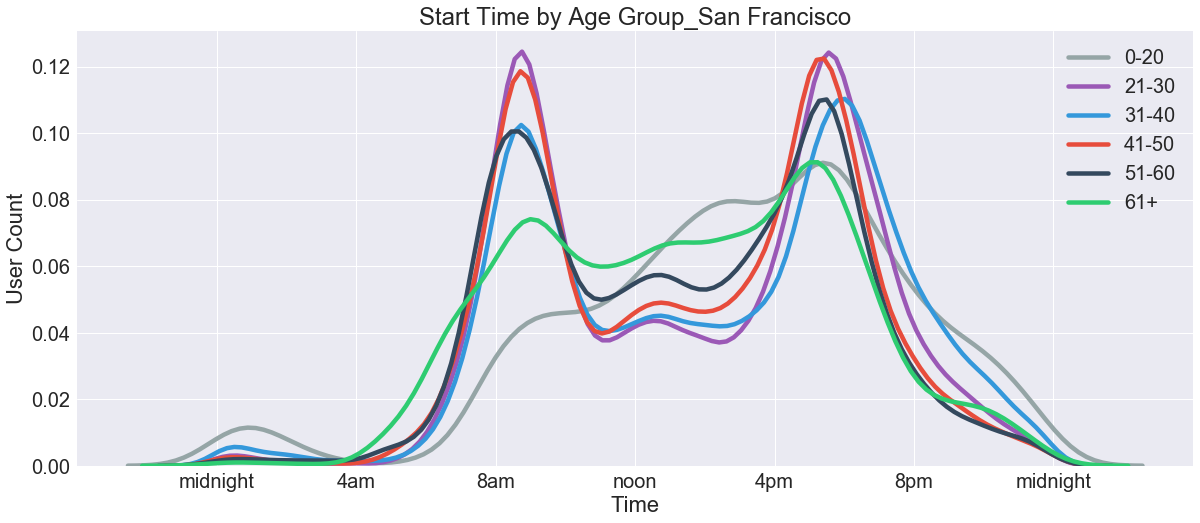

In [13]:
plt.figure(figsize=(20,8))
sns.set(rc={'lines.linewidth':4.5}, font_scale=2)
sns.distplot(zero['start hour'], hist=False, color ='#95a5a6', label = '0-20')
sns.distplot(twenty1['start hour'], hist=False, color ='#9b59b6', label = '21-30')
sns.distplot(thirty1['start hour'], hist=False, color = '#3498db', label = '31-40')
sns.distplot(forty1['start hour'], hist=False, color = '#e74c3c',label = '41-50')
sns.distplot(fifty1['start hour'], hist=False, color = '#34495e',label = '51-60')
sns.distplot(sixty1['start hour'], hist=False, color = '#2ecc71',label = '61+')
plt.legend()
plt.title("Start Time by Age Group_San Francisco")
plt.xlabel("Time")
plt.xticks(np.arange(0, 25, step=4), ('midnight', '4am', '8am', 'noon', '4pm', '8pm', 'midnight'))
plt.ylabel("User Count")
plt.show()

total number of users in New York is: 102979


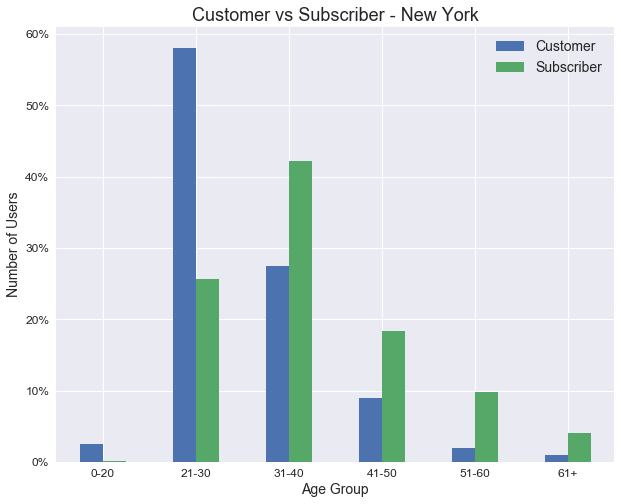

In [14]:
#customer type by age
#NewYork
ny_total_riders = ny_df['usertype'].count()
print('total number of users in New York is: {}'.format(ny_total_riders))

ny_usertype = ny_df.groupby('usertype')['age groups'].value_counts(normalize=True)
ny_usertype
ny_usertype.unstack(0).plot(kind='bar', figsize=(10,8))
plt.legend(fontsize=14)
plt.title('Customer vs Subscriber - New York', fontsize=18)
plt.xlabel("Age Group", fontsize = 14)
plt.ylabel("Number of Users", fontsize = 14)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], fontsize=12) 
plt.xticks(np.arange(6),('0-20', '21-30','31-40','41-50','51-60', '61+'), fontsize= 12, rotation=0)
plt.show()

### Parsing Data - Trip Analysis

In [15]:
#New York most popular times/days
ny_hour_counts=ny_df.hour.value_counts()
print("the most popular hours to ride are: {}".format(ny_hour_counts.head(5).reset_index()))
print()
ny_day_counts=ny_df.day_of_week.value_counts()
print("the most popular days to ride are: {}".format(ny_day_counts.head(5).reset_index()))
print()
ny_month_counts=ny_df.month.value_counts()
print("the most popular months to ride are: {}".format(ny_month_counts.head(5).reset_index()))

the most popular hours to ride are:    index   hour
0      8  12163
1     18  10978
2     17   9984
3     19   7512
4      7   6976

the most popular days to ride are:        index  day_of_week
0    Tuesday        17530
1   Thursday        16649
2  Wednesday        16553
3     Monday        16164
4     Friday        14884

the most popular months to ride are:    index  month
0      5  34455
1      4  23634
2      3  17109
3      2  15104
4      1  12677


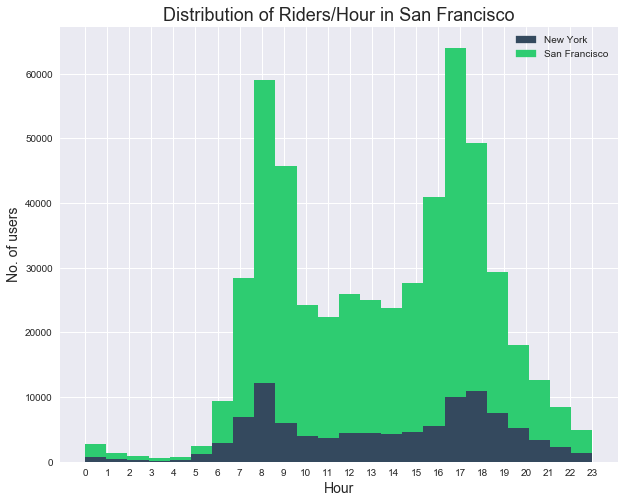

In [16]:
#graph size#graph s 
sns.set()
plt.figure(figsize=(10,8))

#graph type with no. of bins
plt.hist(sf_df['hour'], color="#2ecc71", bins = 24)
plt.hist(ny_df['hour'], color= '#34495e', bins = 24)

#lables
plt.xlabel('Hour', fontsize=14)
plt.ylabel('No. of users', fontsize=14)
plt.xticks(np.arange(0,24,1))

New_York =  mpatches.Patch(color='#34495e', label='New York')
Bay_Area = mpatches.Patch(color= "#2ecc71", label='San Francisco')

#title
plt.title('Distribution of Riders/Hour in San Francisco', fontsize=18)
plt.legend(handles =[New_York,Bay_Area])
#displaying of subscribers
plt.show()

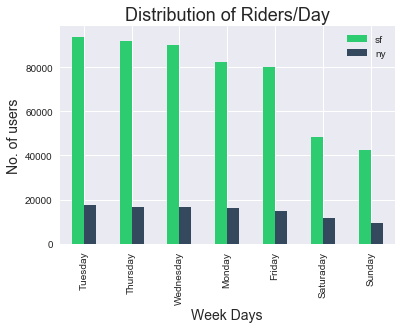

In [21]:
#Riders by day of week
#create dataframe
sf_riders=[93800,91640,90066,82198,80114,48338,42238]
ny_riders=[17530, 16649,16553,16164,14884,11785,9414]
sf_ny = list(zip(sf_riders, ny_riders))
riders=pd.DataFrame(sf_ny)
riders['day'] = ['Tuesday', 'Thursday', 'Wednesday', 'Monday', 'Friday', 'Saturday', 'Sunday']
riders.columns=['sf','ny', 'day']

#create graph
sns.set()
plt.figure(figsize=(10,8))

riders.plot(kind='bar', color=["#2ecc71", '#34495e'] )

#lables
plt.xlabel('Week Days', fontsize=14)
plt.ylabel('No. of users', fontsize=14)

#title
plt.title('Distribution of Riders/Day', fontsize=18)
plt.xticks(np.arange(0,7,1), ('Tuesday', 'Thursday', 'Wednesday', 'Monday', 'Friday','Saturaday', 'Sunday'))

plt.show()

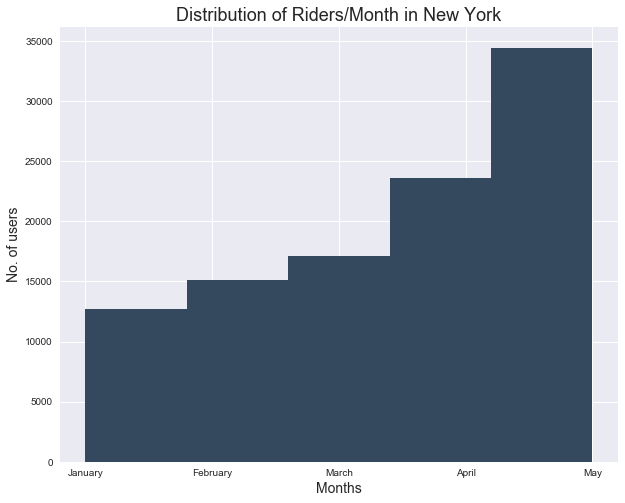

In [20]:
#usage by month
#graph size
sns.set()
plt.figure(figsize=(10,8))

#graph type with no. of bins
plt.hist(ny_df['month'], bins = 5, color='#34495e')

#lables
plt.xlabel('Months', fontsize=14)
plt.ylabel('No. of users', fontsize=14)
plt.xticks(np.arange(1,6,1), ('January', 'February', 'March', 'April', 'May'))


#title
plt.title('Distribution of Riders/Month in New York', fontsize=18)
#displaying of subscribers
plt.show()

### Data Parsing - Location Analysis

In [22]:
ny_data = ny_df.sample(n=100000)
sf_data = sf_df.sample(n=100000)

In [23]:
#New York Start Station popularity
map_ny_start = folium.Map(location=[40.7270, -74.0367],
                    zoom_start = 14) 

# Ensure you're handing it floats
ny_data['start station latitude'] = ny_data['start station latitude'].astype(float)
ny_data['start station longitude'] = ny_data['start station longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_ny = ny_data[['start station latitude', 'start station longitude']].iloc[3000:46000]

# List comprehension to make out list of lists
heat_data_ny = [[row['start station latitude'],row['start station longitude']] for index, row in heat_ny.iterrows()]

# Plot it on the map
HeatMap(heat_data_ny).add_to(map_ny_start)
map_ny_start

In [24]:
#End Sation New York
map_ny_end = folium.Map(location=[40.7270, -74.0367],
                    zoom_start = 14) 

# Ensure you're handing it floats
ny_data['end station latitude'] = ny_data['end station latitude'].astype(float)
ny_data['end station longitude'] = ny_data['end station longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_ny = ny_data[['end station latitude', 'end station longitude']].iloc[3000:46000]

# List comprehension to make out list of lists
heat_data_ny = [[row['end station latitude'],row['end station longitude']] for index, row in heat_ny.iterrows()]

# Plot it on the map
HeatMap(heat_data_ny).add_to(map_ny_end)
map_ny_end